<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%5B%EB%A7%A4%EC%9D%BC10%EB%B6%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%5D_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%88%9C%EC%84%9C%ED%98%95_%EC%9E%90%EB%A3%8C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get install -y fonts-nanum
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')
mpl.rc('font', family='NanumBarunGothic')
!apt-get install -y fonts-nanum
!fc-cache -fv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/python/데이터스테이션/data/Data03.csv')
df1.head(2)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [3]:
df1['datetime(timestmp)'] = pd.to_datetime(df1['datetime'])

<Axes: xlabel='datetime(timestmp)', ylabel='amount'>

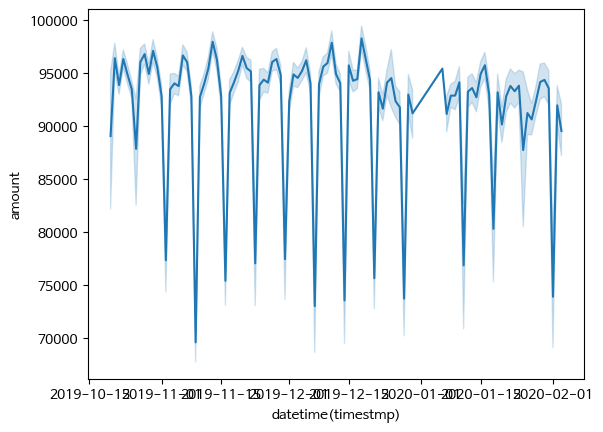

In [4]:
sns.lineplot(data=df1, x='datetime(timestmp)', y='amount')

<ipython-input-5-d606d9dd1f57>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='datetime(timestmp)', y='amount',ci=None, estimator=sum)


<Axes: xlabel='datetime(timestmp)', ylabel='amount'>

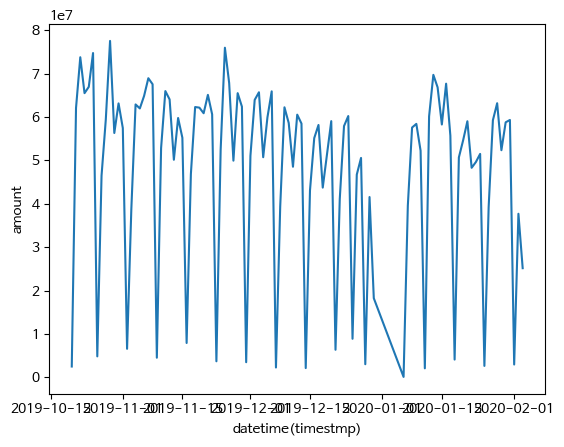

In [5]:
sns.lineplot(data=df1, x='datetime(timestmp)', y='amount',ci=None, estimator=sum)

In [6]:
df1['계약요일'] = df1['datetime(timestmp)'].dt.day_name()

<ipython-input-7-e78b0c804d3c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='계약요일', y='amount', estimator=sum, ci=None)


<Axes: xlabel='계약요일', ylabel='amount'>

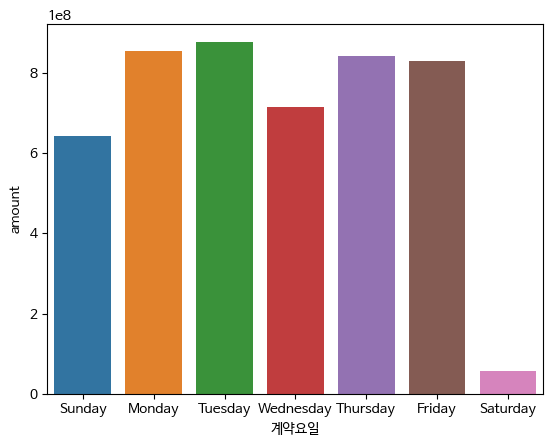

In [7]:
sns.barplot(data=df1, x='계약요일', y='amount', estimator=sum, ci=None)

In [8]:
df1['계약주차'] = df1['datetime(timestmp)'].dt.week

<ipython-input-8-ef89d9ea12aa>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['계약주차'] = df1['datetime(timestmp)'].dt.week


<ipython-input-9-0ccd036c91fe>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='계약주차', y='amount',ci=None, estimator=sum)


<Axes: xlabel='계약주차', ylabel='amount'>

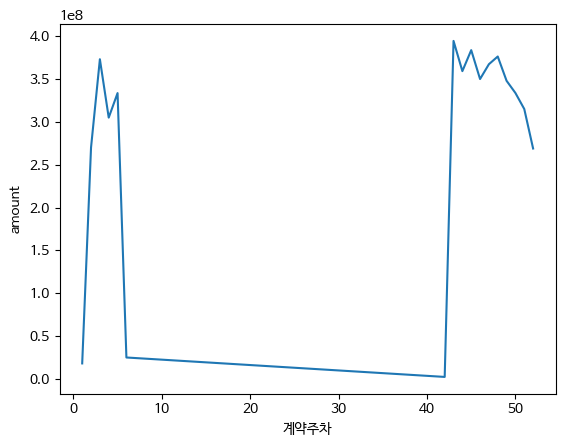

In [9]:
sns.lineplot(data=df1, x='계약주차', y='amount',ci=None, estimator=sum)

In [10]:
df1['datetime(timestmp)'].describe()

<ipython-input-10-1cbe77f1e599>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['datetime(timestmp)'].describe()


count                   51304
unique                    101
top       2019-10-29 00:00:00
freq                      817
first     2019-10-20 00:00:00
last      2020-02-03 00:00:00
Name: datetime(timestmp), dtype: object

In [11]:
df1['계약연도'] = df1['datetime(timestmp)'].dt.year

<ipython-input-13-5db983b81f1a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df1, x='계약주차', y='amount',ci=None,estimator=sum,hue='계약연도')


<Axes: xlabel='계약주차', ylabel='amount'>

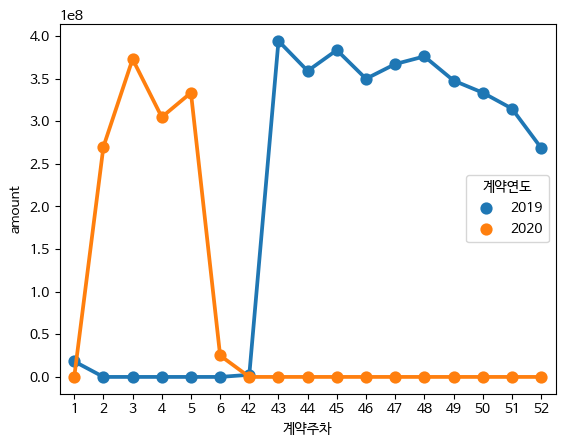

In [13]:
sns.pointplot(data=df1, x='계약주차', y='amount',ci=None,estimator=sum,hue='계약연도')

<ipython-input-18-64947548eb94>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df2, x='계약주차', y='amount',ci=None,estimator=sum, hue='계약연도')


<Axes: xlabel='계약주차', ylabel='amount'>

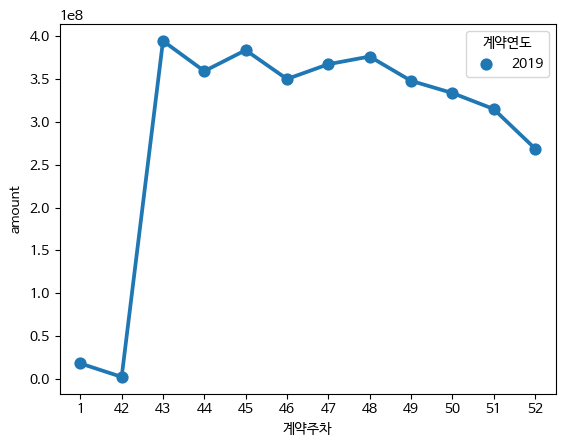

In [18]:
cond1 = (df1['계약연도']==2019)
df2 = df1.loc[cond1]
sns.pointplot(data=df2, x='계약주차', y='amount',ci=None,estimator=sum, hue='계약연도')